In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../scripts/')
import manage_files as mf
import average_correl_functions as acf


/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [2]:
expT1_eElab=np.loadtxt("../../experimental_relaxation_data/eElaB_DSDS_T1_experiment.dat")
expT2_eElab=np.loadtxt("../../experimental_relaxation_data/eElaB_DSDS_T2_experiment.dat")
expNOE_eElab=np.loadtxt("../../experimental_relaxation_data/eElaB_DSDS_hetnoe_experiment.dat")

In [3]:
output_path_relax="../../../relax_times_yamls/protein/raw_data/"            # folder to save spin relaxation times yaml files, 
                                     
output_path_timescales="../../../timescales_yamls/protein/raw_data/"  # folder to save timescale yaml files
                                     
relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)
timescales_yamls=acf.set_biggest_ts_to_zero(timescales_yamls) # remove artificial weights of slow timescales 

Spin relaxation data exist for:

   * GWALP_dimer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_23500water_replica1
   * GWALP_monomer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_73800water_replica1
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * GWALP_dimer_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_N

In [4]:
for name in timescales_yamls:
    if 'eEla' in name:
        print(name)
        

eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2


/tmp/ipykernel_257754/2779690740.py:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(np.linspace(2,22,21),T1,"-",linewidth=1,linestyle="--",color="C0")
/tmp/ipykernel_257754/2779690740.py:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(np.linspace(2,22,21),T2,"-",linewidth=1,linestyle="--",color="C0")
/tmp/ipykernel_257754/2779690740.py:76: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax3.plot(np.linspace(2,22,21),NOE,"-",linewidth=1,linestyle="--",color="C0")
/tmp/ipykernel_257754/2779690740.py:91: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string 

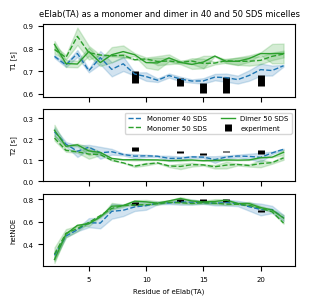

In [5]:
plt.rcParams["figure.figsize"] = [3, 3]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})

fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True)

ax1.set_ylabel("T1 [s]")
    
ax2.set_ylabel("T2 [s]")

ax3.set_ylabel("hetNOE")
ax3.set_xlabel("Residue of eElab(TA)")
ax1.set_title("eElab(TA) as a monomer and dimer in 40 and 50 SDS micelles")
max_T1=0
max_T2=0
max_noe=0
min_noe=0
col=["blue","orange","green","red","purple","brown","ping","gray","olive","cyan"]
col=["C0","C1","C2","C3","C4","C5","C6","C7"]
colors=[]


ax1.errorbar(expT1_eElab[:,0],expT1_eElab[:,2],expT1_eElab[:,3],None,"none",color="black",markersize=1,linewidth=5,label="experiment")
ax2.errorbar(expT2_eElab[:,0],expT2_eElab[:,2],expT2_eElab[:,3],None,"none",color="black",markersize=1,linewidth=5,label="experiment")
ax3.errorbar(expNOE_eElab[:,0],expNOE_eElab[:,2],expNOE_eElab[:,3],None,"none",color="black",markersize=1,linewidth=5)

forties={'T1':[],'T2':[],'hetNOE':[]}
fifties={'T1':[],'T2':[],'hetNOE':[]}
dim={'T1':[],'T2':[],'hetNOE':[]}
for name,data in relaxation_yamls.items():
    if 'eElab' in name and '40' in name:
        for ex in forties:
            forties[ex].append([])
        for i,exprs in data["analysis0"]["results"].items():
            for ex,value in exprs.items():
                try:
                    forties[ex][-1].append(value)
                except:
                    pass
    if 'eElab' in name and '50' in name:
        for ex in forties:
            fifties[ex].append([])
        for i,exprs in data["analysis0"]["results"].items():
            for ex,value in exprs.items():
                try:
                    fifties[ex][-1].append(value)
                except:
                    pass
    if 'eElaB' in name:
        for ex in forties:
            dim[ex].append([])
            dim[ex].append([])
        for i,exprs in data["analysis0"]["results"].items():
            if i<len(data["analysis0"]["results"])//2:
                pos=0
            else:
                pos=1
            for ex,value in exprs.items():
                try:
                    dim[ex][pos].append(value)
                except:
                    pass

                
T1=np.mean(forties['T1'],axis=0)
T1_err=np.std(forties['T1'],axis=0)
T2=np.mean(forties['T2'],axis=0)
T2_err=np.std(forties['T2'],axis=0)
NOE=np.mean(forties['hetNOE'],axis=0)
NOE_err=np.std(forties['hetNOE'],axis=0)

max_T2=max(max_T2,max(T2))

ax1.plot(np.linspace(2,22,21),T1,"-",linewidth=1,linestyle="--",color="C0")
ax2.plot(np.linspace(2,22,21),T2,"-",linewidth=1,linestyle="--",color="C0")
ax3.plot(np.linspace(2,22,21),NOE,"-",linewidth=1,linestyle="--",color="C0")

ax1.fill_between(np.linspace(2,22,21),np.array(T1)-np.array(T1_err), np.array(T1)+np.array(T1_err),alpha=0.2,color="C0")
ax2.fill_between(np.linspace(2,22,21),np.array(T2)-np.array(T2_err), np.array(T2)+np.array(T2_err),alpha=0.2,color="C0")
ax3.fill_between(np.linspace(2,22,21),np.array(NOE)-np.array(NOE_err), np.array(NOE)+np.array(NOE_err),alpha=0.2,color="C0")
   
T1=np.mean(fifties['T1'],axis=0)
T1_err=np.std(fifties['T1'],axis=0)
T2=np.mean(fifties['T2'],axis=0)
T2_err=np.std(fifties['T2'],axis=0)
NOE=np.mean(fifties['hetNOE'],axis=0)
NOE_err=np.std(fifties['hetNOE'],axis=0)     

max_T2=max(max_T2,max(T2))

ax1.plot(np.linspace(2,22,21),T1,"-",linewidth=1,linestyle="--",color="C2")
ax2.plot(np.linspace(2,22,21),T2,"-",linewidth=1,linestyle="--",color="C2")
ax3.plot(np.linspace(2,22,21),NOE,"-",linewidth=1,linestyle="--",color="C2")

ax1.fill_between(np.linspace(2,22,21),np.array(T1)-np.array(T1_err), np.array(T1)+np.array(T1_err),alpha=0.2,color="C2")
ax2.fill_between(np.linspace(2,22,21),np.array(T2)-np.array(T2_err), np.array(T2)+np.array(T2_err),alpha=0.2,color="C2")
ax3.fill_between(np.linspace(2,22,21),np.array(NOE)-np.array(NOE_err), np.array(NOE)+np.array(NOE_err),alpha=0.2,color="C2")
    
T1=np.mean(dim['T1'],axis=0)
T1_err=np.std(dim['T1'],axis=0)
T2=np.mean(dim['T2'],axis=0)
T2_err=np.std(dim['T2'],axis=0)
NOE=np.mean(dim['hetNOE'],axis=0)
NOE_err=np.std(dim['hetNOE'],axis=0) 

max_T2=max(max_T2,max(T2))
    
ax1.plot(np.linspace(2,22,21),T1,"-",linewidth=1,color="C2")
ax2.plot(np.linspace(2,22,21),T2,"-",linewidth=1,color="C2")
ax3.plot(np.linspace(2,22,21),NOE,"-",linewidth=1,color="C2")

ax1.fill_between(np.linspace(2,22,21),np.array(T1)-np.array(T1_err), np.array(T1)+np.array(T1_err),alpha=0.2,color="C2")
ax2.fill_between(np.linspace(2,22,21),np.array(T2)-np.array(T2_err), np.array(T2)+np.array(T2_err),alpha=0.2,color="C2")
ax3.fill_between(np.linspace(2,22,21),np.array(NOE)-np.array(NOE_err), np.array(NOE)+np.array(NOE_err),alpha=0.2,color="C2")


ax3.set_xticks(np.arange(0, 22, 5))


ax2.plot(i+0.1,-5,"-",color=col[0],linewidth=1,label="Monomer 40 SDS",linestyle="--")    
ax2.plot(i+0.1,-5,"-",color=col[2],linewidth=1,label="Monomer 50 SDS",linestyle="--")
ax2.plot(i+0.1,-5,"-",color=col[2],linewidth=1,label="Dimer 50 SDS")


#ax1.set_ylim([0.5,max_T1+0.1 ])
ax2.set_ylim([0,max_T2+0.1])
#ax3.set_ylim([min_noe-0.1,max_noe+0.3 ])

#ax1.legend()
ax2.legend(ncol=2)

plt.savefig("eElab_mono_dim.pdf")

In [23]:
save={"eElaB_40SDS_monomer":forties,
      "eElaB_50SDS_monomer":fifties,
      "eElaB_50SDS_dimer":dim}
expr=['T1','T2','hetNOE']
for name, data in save.items():
    for ex in expr:
        res=np.mean(data[ex],axis=0)
        res_err=np.std(data[ex],axis=0)
    to_save=[(list(range(2,23))),list(res),list(res_err)]
    save_name=f'exported_simulation_data/{ex}_{name}.dat'

    np.savetxt(save_name,np.transpose(to_save),header=f" Data for: {name} \n Experiment: {ex} \n Replicas/peptides in monomers: {len(data[ex])} \n Residue,  Average SRT over replicas [s], Error [s] ")
